# EDA

In this notebook we will perform Exploratory data analysis on the airbnb dataset

In [1]:
!pip install transformers

StatementMeta(, 28e3b034-4741-445d-bfc1-6aa32f961139, 3, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 77.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 160.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.1 MB/s eta 0:00:00:00:0100:01


In [14]:
# Import librariers

import pyspark.pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


StatementMeta(, be25cada-29d6-40d8-a83d-e0f807bfdd2f, 16, Finished, Available)

In [20]:
## Load in data from Fabric lakehouse

psdf_loaded = ps.DataFrame(spark.sql("SELECT * FROM sb_lakehouse.airbnb_listings_loaded"))
psdf_transformed = ps.DataFrame(spark.sql("SELECT * FROM sb_lakehouse.airbnb_listings_transformed"))


StatementMeta(, be25cada-29d6-40d8-a83d-e0f807bfdd2f, 22, Finished, Available)

In [4]:
psdf_loaded.columns

StatementMeta(, be25cada-29d6-40d8-a83d-e0f807bfdd2f, 6, Finished, Available)

Index(['access', 'accommodates', 'amenities', 'availability_30',
       'availability_365', 'availability_60', 'availability_90', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'cleaning_fee', 'country', 'country_code', 'description',
       'experiences_offered', 'extra_people', 'features', 'first_review',
       'geolocation', 'guests_included', 'host_about', 'host_id',
       'host_listings_count', 'host_location', 'host_name',
       'host_neighbourhood', 'host_picture_url', 'host_response_rate',
       'host_response_time', 'host_since', 'host_thumbnail_url',
       'host_total_listings_count', 'host_url', 'host_verifications',
       'house_rules', 'id', 'interaction', 'last_review', 'last_scraped',
       'latitude', 'listing_url', 'longitude', 'market', 'maximum_nights',
       'medium_url', 'minimum_nights', 'monthly_price', 'name',
       'neighborh

In [5]:
## Describe numerical fields

psdf_loaded.describe()

StatementMeta(, be25cada-29d6-40d8-a83d-e0f807bfdd2f, 7, Finished, Available)

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,cleaning_fee,extra_people,guests_included,host_listings_count,host_response_rate,host_total_listings_count,maximum_nights,minimum_nights,monthly_price,number_of_reviews,price,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,square_feet,weekly_price
count,184544.000000,184544.000000,184544.000000,184544.000000,184544.000000,184181.000000,184329.000000,184238.000000,184544.000000,122440.000000,184527.000000,184544.000000,184368.000000,136718.000000,184368.000000,1.845440e+05,184544.000000,32041.000000,184544.000000,180205.000000,139072.000000,138944.000000,139188.000000,139139.000000,138954.000000,139409.000000,138895.000000,141594.000000,76583.000000,4138.000000,33039.000000
mean,3.197915,8.741948,145.796943,20.401292,33.678662,1.210627,1.345144,1.852609,4.446549,70.740910,13.621757,1.512030,6.274115,93.490221,6.274115,1.504715e+05,3.685576,3338.620268,15.583471,158.078932,9.555748,9.712409,9.338506,9.730615,9.512875,93.220194,9.333857,1.448174,294.598305,504.970517,525.959623
std,1.877933,10.585602,138.369310,21.944166,33.553563,0.552791,0.892057,1.350464,23.500187,90.724607,37.849836,1.122225,37.937346,17.573088,37.937346,1.710874e+07,142.686259,5021.683248,30.050118,170.929579,0.827961,0.700160,1.027022,0.698238,0.772502,8.236910,0.885279,1.720826,177.448866,989.118618,211.364243
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,272.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000,0.010000,0.000000,0.000000,55.000000
25%,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,25.000000,0.000000,1.000000,1.000000,99.000000,1.000000,3.100000e+01,1.000000,1300.000000,1.000000,62.000000,9.000000,10.000000,9.000000,10.000000,9.000000,90.000000,9.000000,0.310000,150.000000,0.000000,350.000000
50%,2.000000,4.000000,94.000000,12.000000,24.000000,1.000000,1.000000,1.000000,1.000000,40.000000,0.000000,1.000000,1.000000,100.000000,1.000000,1.125000e+03,2.000000,2000.000000,4.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,95.000000,10.000000,0.830000,250.000000,323.000000,500.000000
75%,4.000000,16.000000,293.000000,39.000000,65.000000,1.000000,2.000000,2.000000,2.000000,75.000000,15.000000,2.000000,2.000000,100.000000,2.000000,1.125000e+03,3.000000,3300.000000,16.000000,169.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,1.990000,400.000000,753.000000,699.000000
max,17.000000,30.000000,365.000000,60.000000,90.000000,8.000000,10.000000,16.000000,752.000000,996.000000,900.000000,20.000000,959.000000,100.000000,959.000000,2.147484e+09,60000.000000,180000.000000,605.000000,999.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000,90.000000,999.000000,21528.000000,999.000000


What is quite noticeable in this dataset that the mean review scores are excessively high. This seems like a red flag.The median review score for alle review columns is a 10, which is also very remarkeable.

In [6]:
## Generate heatmap and try to identify inner correlation

pd_transformed = psdf_transformed.to_spark().toPandas()

StatementMeta(, be25cada-29d6-40d8-a83d-e0f807bfdd2f, 8, Finished, Available)

/opt/spark/python/lib/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


In [6]:
correlation_matrix = pd_transformed.corr()
correlation_matrix

StatementMeta(, b5ccd9c3-306f-4285-bd4f-0a63fa6be72a, 8, Finished, Available)

,accommodates,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,extra_people,guests_included,...,property_type_Train,property_type_Treehouse,property_type_Vacation_home,property_type_Villa,property_type_Yurt,room_type_Entire_home_or_apt,room_type_Private_room,room_type_Shared_room,polar_r,polar_theta
accommodates,1.000000,0.016967,0.071751,0.012502,0.005914,0.481449,0.713835,0.805384,0.097196,0.509818,...,0.002420,-0.001756,0.009323,0.036713,0.000866,0.413163,-0.398597,-0.073912,0.014171,0.011639
availability_30,0.016967,1.000000,0.591757,0.938512,0.882235,0.062010,-0.015325,0.022984,0.024298,0.013499,...,-0.001717,0.002745,0.004043,0.036030,0.005554,-0.171165,0.145883,0.098552,0.080509,0.068786
availability_365,0.071751,0.591757,1.000000,0.657725,0.691812,0.054241,-0.008573,0.068984,0.036842,0.086749,...,-0.001921,0.004910,0.007312,0.029739,0.002042,-0.084377,0.072572,0.046259,-0.001011,0.077564
availability_60,0.012502,0.938512,0.657725,1.000000,0.972219,0.052892,-0.029388,0.016299,0.031335,0.021612,...,-0.000895,0.003728,0.005179,0.034673,0.005832,-0.173362,0.149833,0.092485,0.090743,0.055799
availability_90,0.005914,0.882235,0.691812,0.972219,1.000000,0.047556,-0.041066,0.008665,0.028293,0.023348,...,-0.000045,0.003984,0.006288,0.032837,0.006433,-0.175661,0.153542,0.087637,0.093237,0.047947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
room_type_Entire_home_or_apt,0.413163,-0.171165,-0.084377,-0.173362,-0.175661,0.065758,0.233516,0.277855,0.026652,0.223824,...,-0.003448,0.001195,0.005443,-0.015879,-0.006177,1.000000,-0.960589,-0.193567,-0.089931,-0.012140
room_type_Private_room,-0.398597,0.145883,0.072572,0.149833,0.153542,-0.076969,-0.223327,-0.291042,-0.026551,-0.211485,...,0.003590,-0.000908,-0.005068,0.016991,0.006522,-0.960589,1.000000,-0.086778,0.075876,0.001102
room_type_Shared_room,-0.073912,0.098552,0.046259,0.092485,0.087637,0.035950,-0.048669,0.031326,-0.001808,-0.055742,...,-0.000312,-0.001079,-0.001619,-0.003059,-0.000881,-0.193567,-0.086778,1.000000,0.054505,0.039617
polar_r,0.014171,0.080509,-0.001011,0.090743,0.093237,0.102270,0.081311,-0.014441,-0.025134,0.014316,...,0.000201,0.005338,-0.008413,0.000530,0.002239,-0.089931,0.075876,0.054505,1.000000,-0.355172


StatementMeta(, b5ccd9c3-306f-4285-bd4f-0a63fa6be72a, 9, Finished, Available)

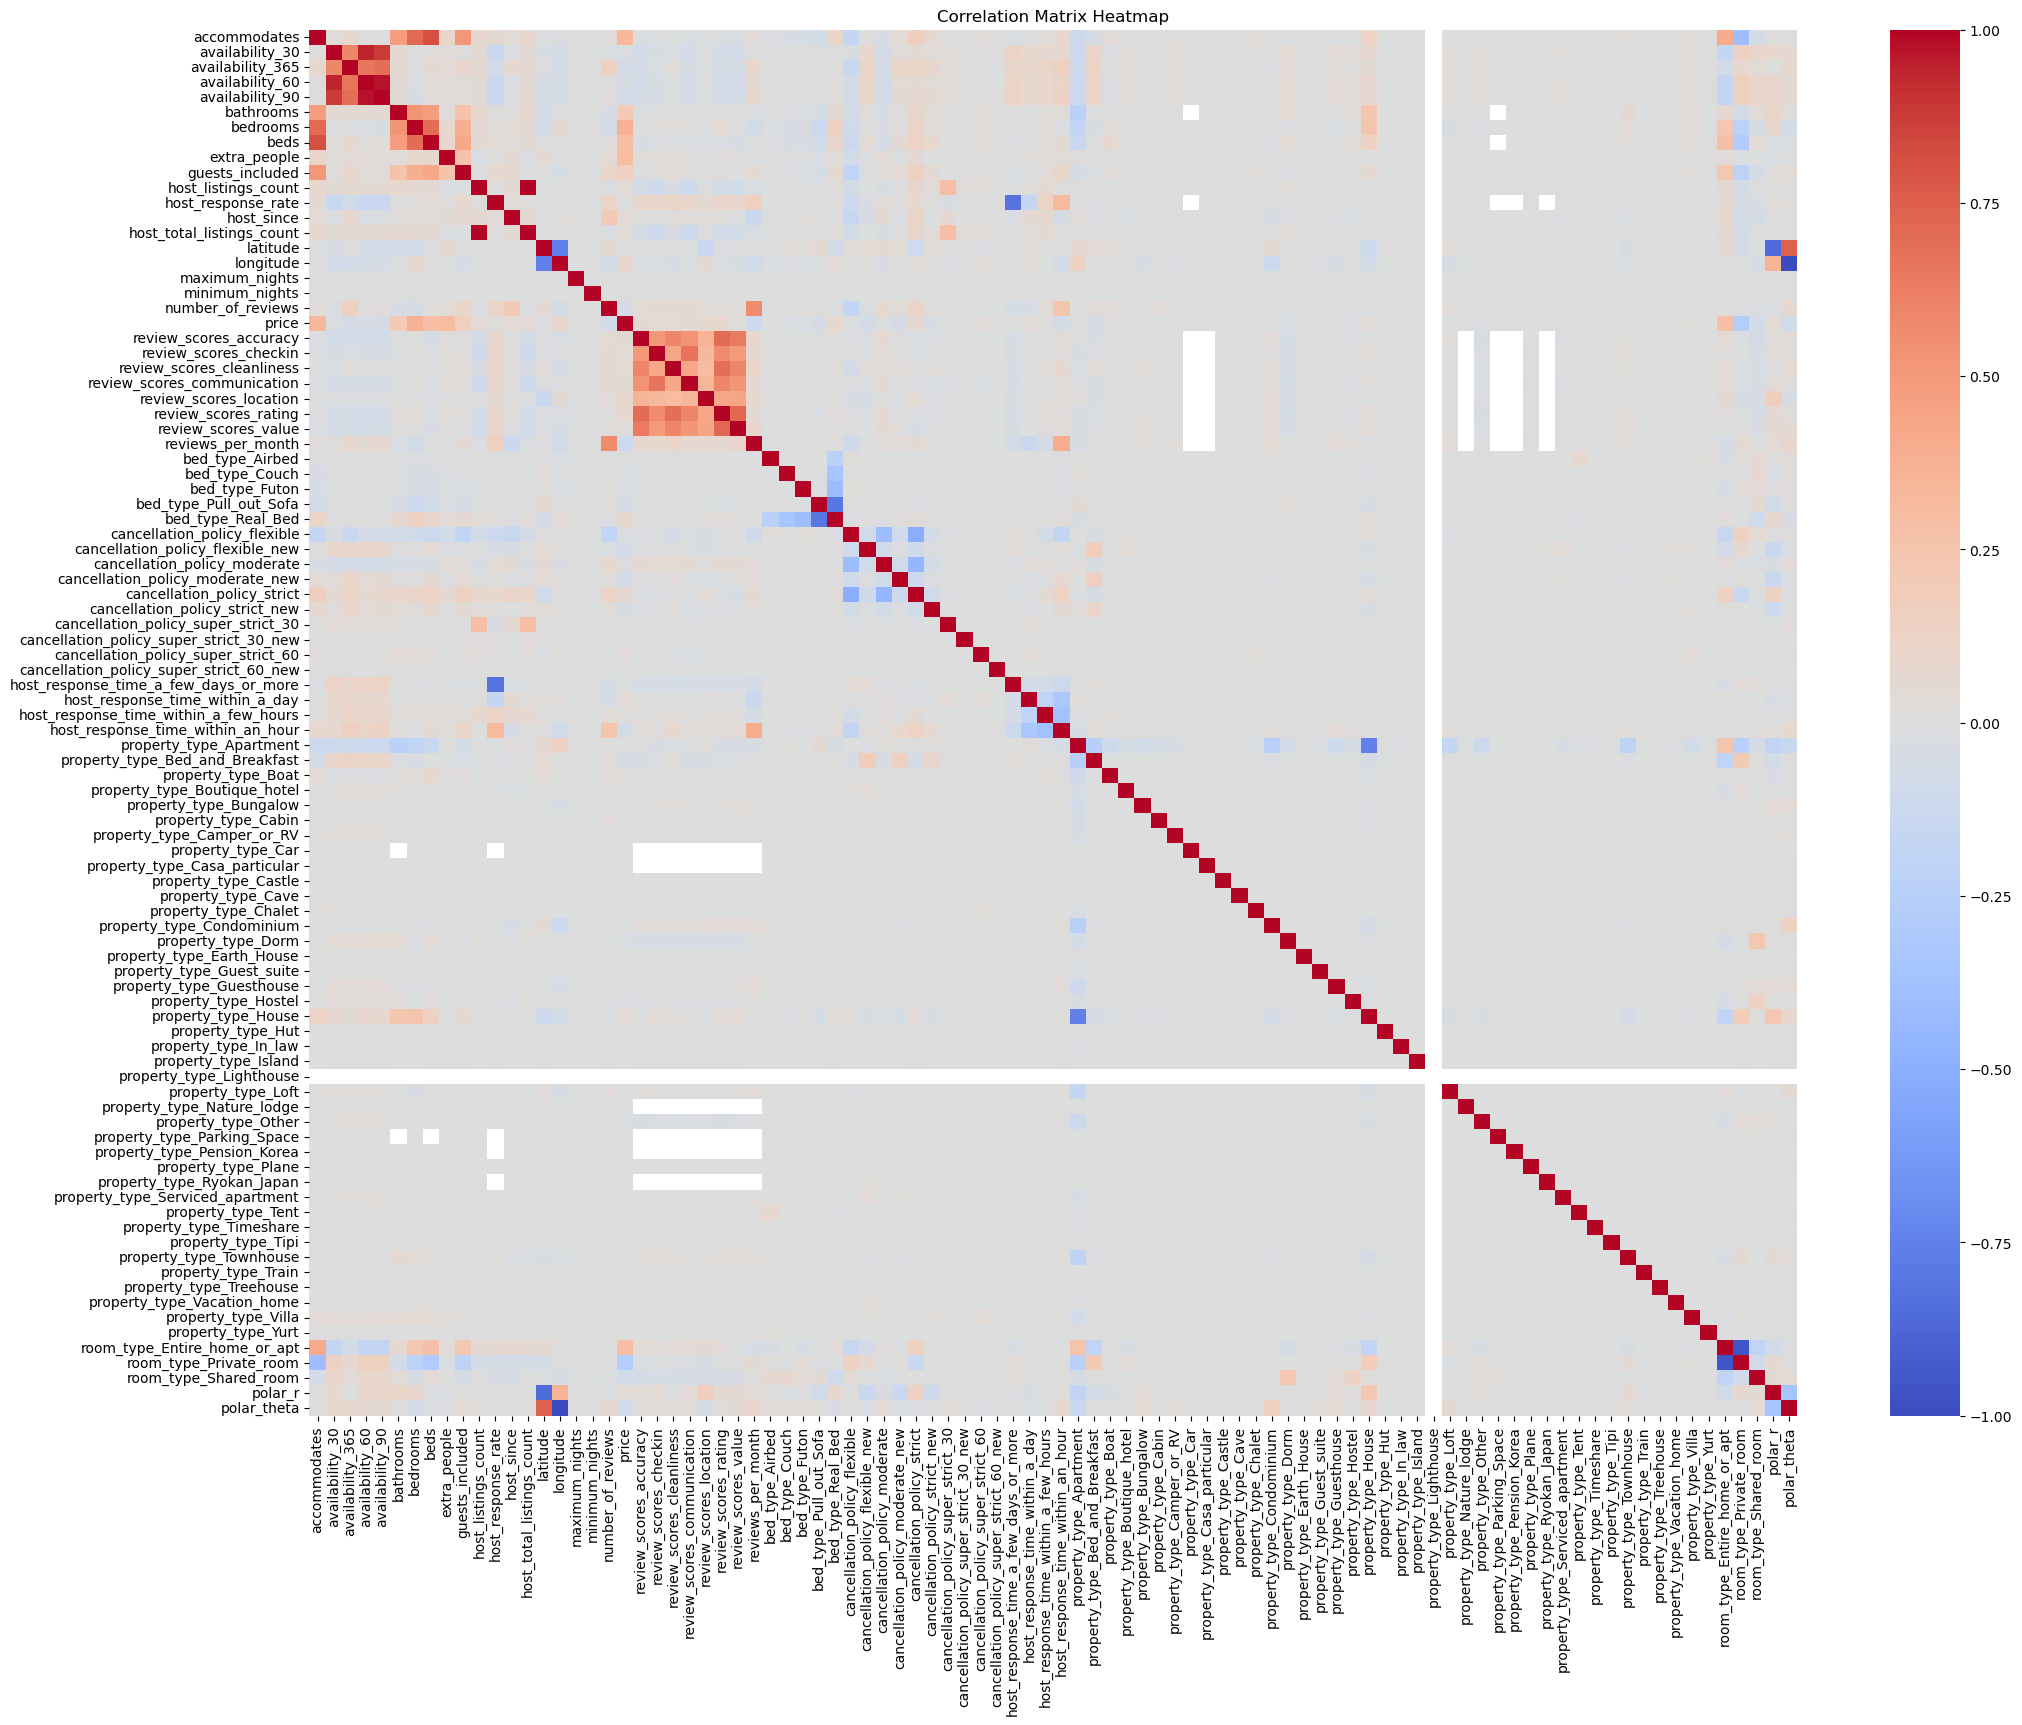

In [7]:


plt.figure(figsize=(24, 18))
sb.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

We can notice some specific things here, for example that all review scores are very strongly inter correlated. Of course longitude and latitude are correlated with the polar coordinates, which makes sense because they are derived from longitude and latitude.  

In [17]:
correlation_sets = {}

for x in correlation_matrix:
    correlation_sets[x] = []
    series = correlation_matrix[x]
    filtered = series[(series > 0.5) & (series < 1) ]
    for idx, value in filtered.iteritems():
        correlation_sets[x].append({idx: value})

for key,value in correlation_sets.items(): print(f"Variable: {key}, Pairing: {value} \n")

StatementMeta(, b5ccd9c3-306f-4285-bd4f-0a63fa6be72a, 19, Finished, Available)

Variable: accommodates, Pairing: [{'bedrooms': 0.7138353934823026}, {'beds': 0.8053836904016091}, {'guests_included': 0.5098177251471924}] 

Variable: availability_30, Pairing: [{'availability_365': 0.5917569686663269}, {'availability_60': 0.938512434512943}, {'availability_90': 0.8822352382009762}] 

Variable: availability_365, Pairing: [{'availability_30': 0.5917569686663269}, {'availability_60': 0.6577253296077127}, {'availability_90': 0.69181194968359}] 

Variable: availability_60, Pairing: [{'availability_30': 0.938512434512943}, {'availability_365': 0.6577253296077127}, {'availability_90': 0.9722188866006436}] 

Variable: availability_90, Pairing: [{'availability_30': 0.8822352382009762}, {'availability_365': 0.69181194968359}, {'availability_60': 0.9722188866006436}] 

Variable: bathrooms, Pairing: [{'bedrooms': 0.5250149195351512}] 

Variable: bedrooms, Pairing: [{'accommodates': 0.7138353934823026}, {'bathrooms': 0.5250149195351512}, {'beds': 0.6980768248656051}] 

Variable: b

/tmp/ipykernel_9436/115195278.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in filtered.iteritems():


In [19]:
print(psdf_loaded["reviews_per_month"][:100])
print(psdf_loaded["number_of_reviews"][:100])

StatementMeta(, be25cada-29d6-40d8-a83d-e0f807bfdd2f, 21, Finished, Available)

0     0.74
1     1.20
2     0.36
3     4.62
4     0.71
5     2.56
6     5.24
7     1.03
8     2.22
9     1.51
10    0.16
11    0.83
12     NaN
13    1.70
14    0.65
15    1.58
16    0.10
17     NaN
18    0.22
19    0.15
20    2.17
21     NaN
22    5.96
23     NaN
24    4.40
25    0.11
26    0.20
27    0.79
28    1.00
29    0.08
30    0.66
31    1.77
32    2.61
33    4.15
34    1.95
35     NaN
36    0.93
37    0.13
38    0.22
39    2.42
40    6.64
41     NaN
42    4.47
43    0.51
44    0.35
45    4.17
46    2.70
47    3.33
48    0.30
49    2.00
50     NaN
51    5.95
52    4.12
53    1.90
54     NaN
55    0.05
56     NaN
57    0.38
58     NaN
59     NaN
60    0.23
61    0.57
62    1.30
63    0.36
64     NaN
65    2.65
66    1.03
67    1.03
68    2.42
69    0.82
70    2.32
71    0.47
72     NaN
73    2.21
74    3.20
75    1.63
76    7.06
77    3.86
78     NaN
79     NaN
80    0.09
81     NaN
82    1.27
83    1.15
84    0.40
85     NaN
86    2.51
87     NaN
88    0.35
89     NaN
90    3.49

Intercorrelations to take into account:

- Review scores (DELETE all review scores as they do not seem realistic)
- Availability rates (exclude 2 out of 4 variables)
- Accomodates correlates naturally with amount of beds, bedrooms & guests included
- Total number of reviews coorelates with reviews per month, therefore we will drop total number of reviews



In [26]:
#Let's check which variables correlates most with price

print(correlation_matrix['price'].sort_values(ascending=False)[:11])
print(correlation_matrix['price'].sort_values(ascending=True)[:10])

# Base





StatementMeta(, b5ccd9c3-306f-4285-bd4f-0a63fa6be72a, 28, Finished, Available)

price                           1.000000
bedrooms                        0.372582
accommodates                    0.333774
extra_people                    0.311694
room_type_Entire_home_or_apt    0.284442
beds                            0.282733
bathrooms                       0.208707
guests_included                 0.160343
longitude                       0.089154
review_scores_rating            0.079452
review_scores_location          0.073335
Name: price, dtype: float64
room_type_Private_room              -0.266272
reviews_per_month                   -0.114798
polar_theta                         -0.092975
room_type_Shared_room               -0.079623
host_response_time_within_an_hour   -0.073166
number_of_reviews                   -0.069394
availability_365                    -0.067468
cancellation_policy_flexible_new    -0.065570
availability_90                     -0.064290
cancellation_policy_moderate_new    -0.063936
Name: price, dtype: float64


StatementMeta(, be25cada-29d6-40d8-a83d-e0f807bfdd2f, 34, Submitted, Running)

/opt/spark/python/lib/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/opt/spark/python/lib/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Figure size 2000x2000 with 0 Axes>

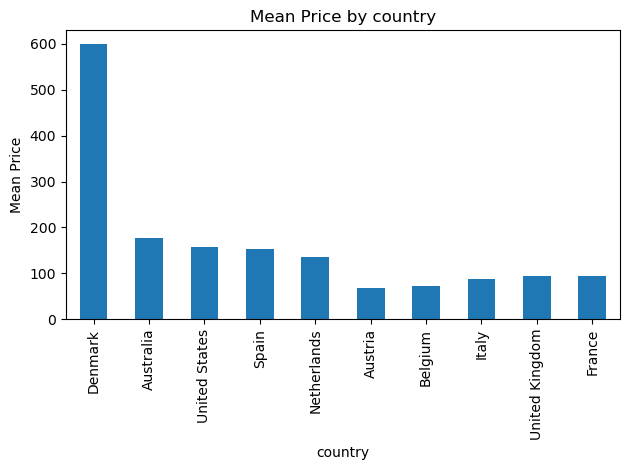

/opt/spark/python/lib/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/opt/spark/python/lib/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Figure size 2000x2000 with 0 Axes>

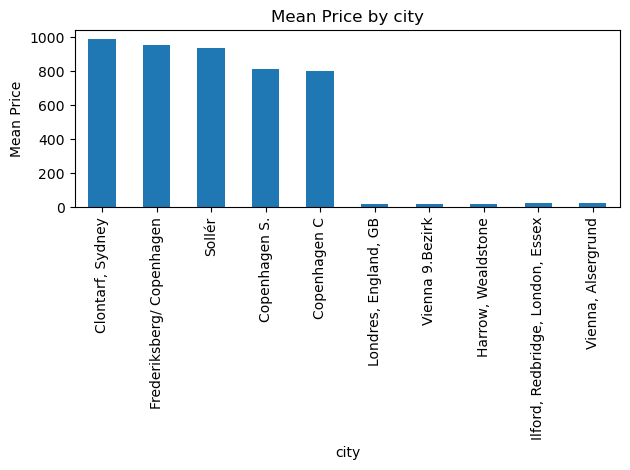

/opt/spark/python/lib/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/opt/spark/python/lib/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


<Figure size 2000x2000 with 0 Axes>

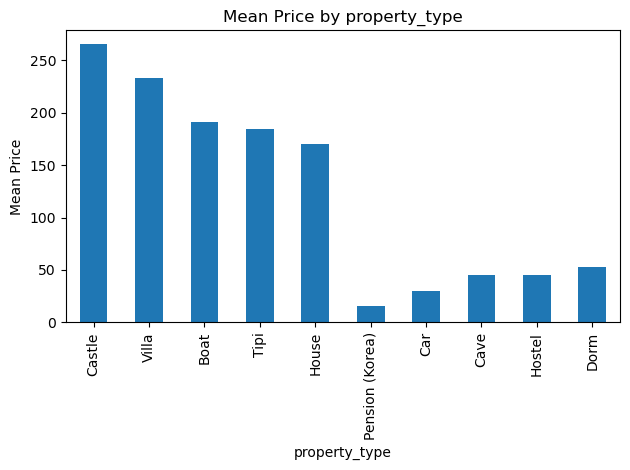

In [32]:
## Visually distributions of

# - prices
 # - Compare per cities
 # -country
 # property type
 # bed
dimensions = ['country', 'city', 'property_type', 'bed_type']

def create_plot(grouped, dim):
    plt.figure(figsize =(20, 20))
    grouped.plot(kind='bar', x=dim, y='price', legend=False)
    plt.ylabel('Mean Price')
    plt.title(f'Mean Price by {dim}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

for dim in dimensions:
    grouped = psdf_loaded.groupby([dim]).price.mean().reset_index()
    pd_grouped = grouped.to_pandas()
    if dim in ['country', 'city', 'property_type']:
        top_5 = grouped.sort_values(by = 'price', ascending=False)[:5]
        bottom_5 = grouped.sort_values(by = 'price', ascending=True)[:5]
        grouped_stacked = ps.concat([top_5, bottom_5], ignore_index=True).to_pandas()
        create_plot(grouped_stacked, dim)
    else:
        create_plot(pd_grouped, dim)



StatementMeta(, be25cada-29d6-40d8-a83d-e0f807bfdd2f, 17, Finished, Available)

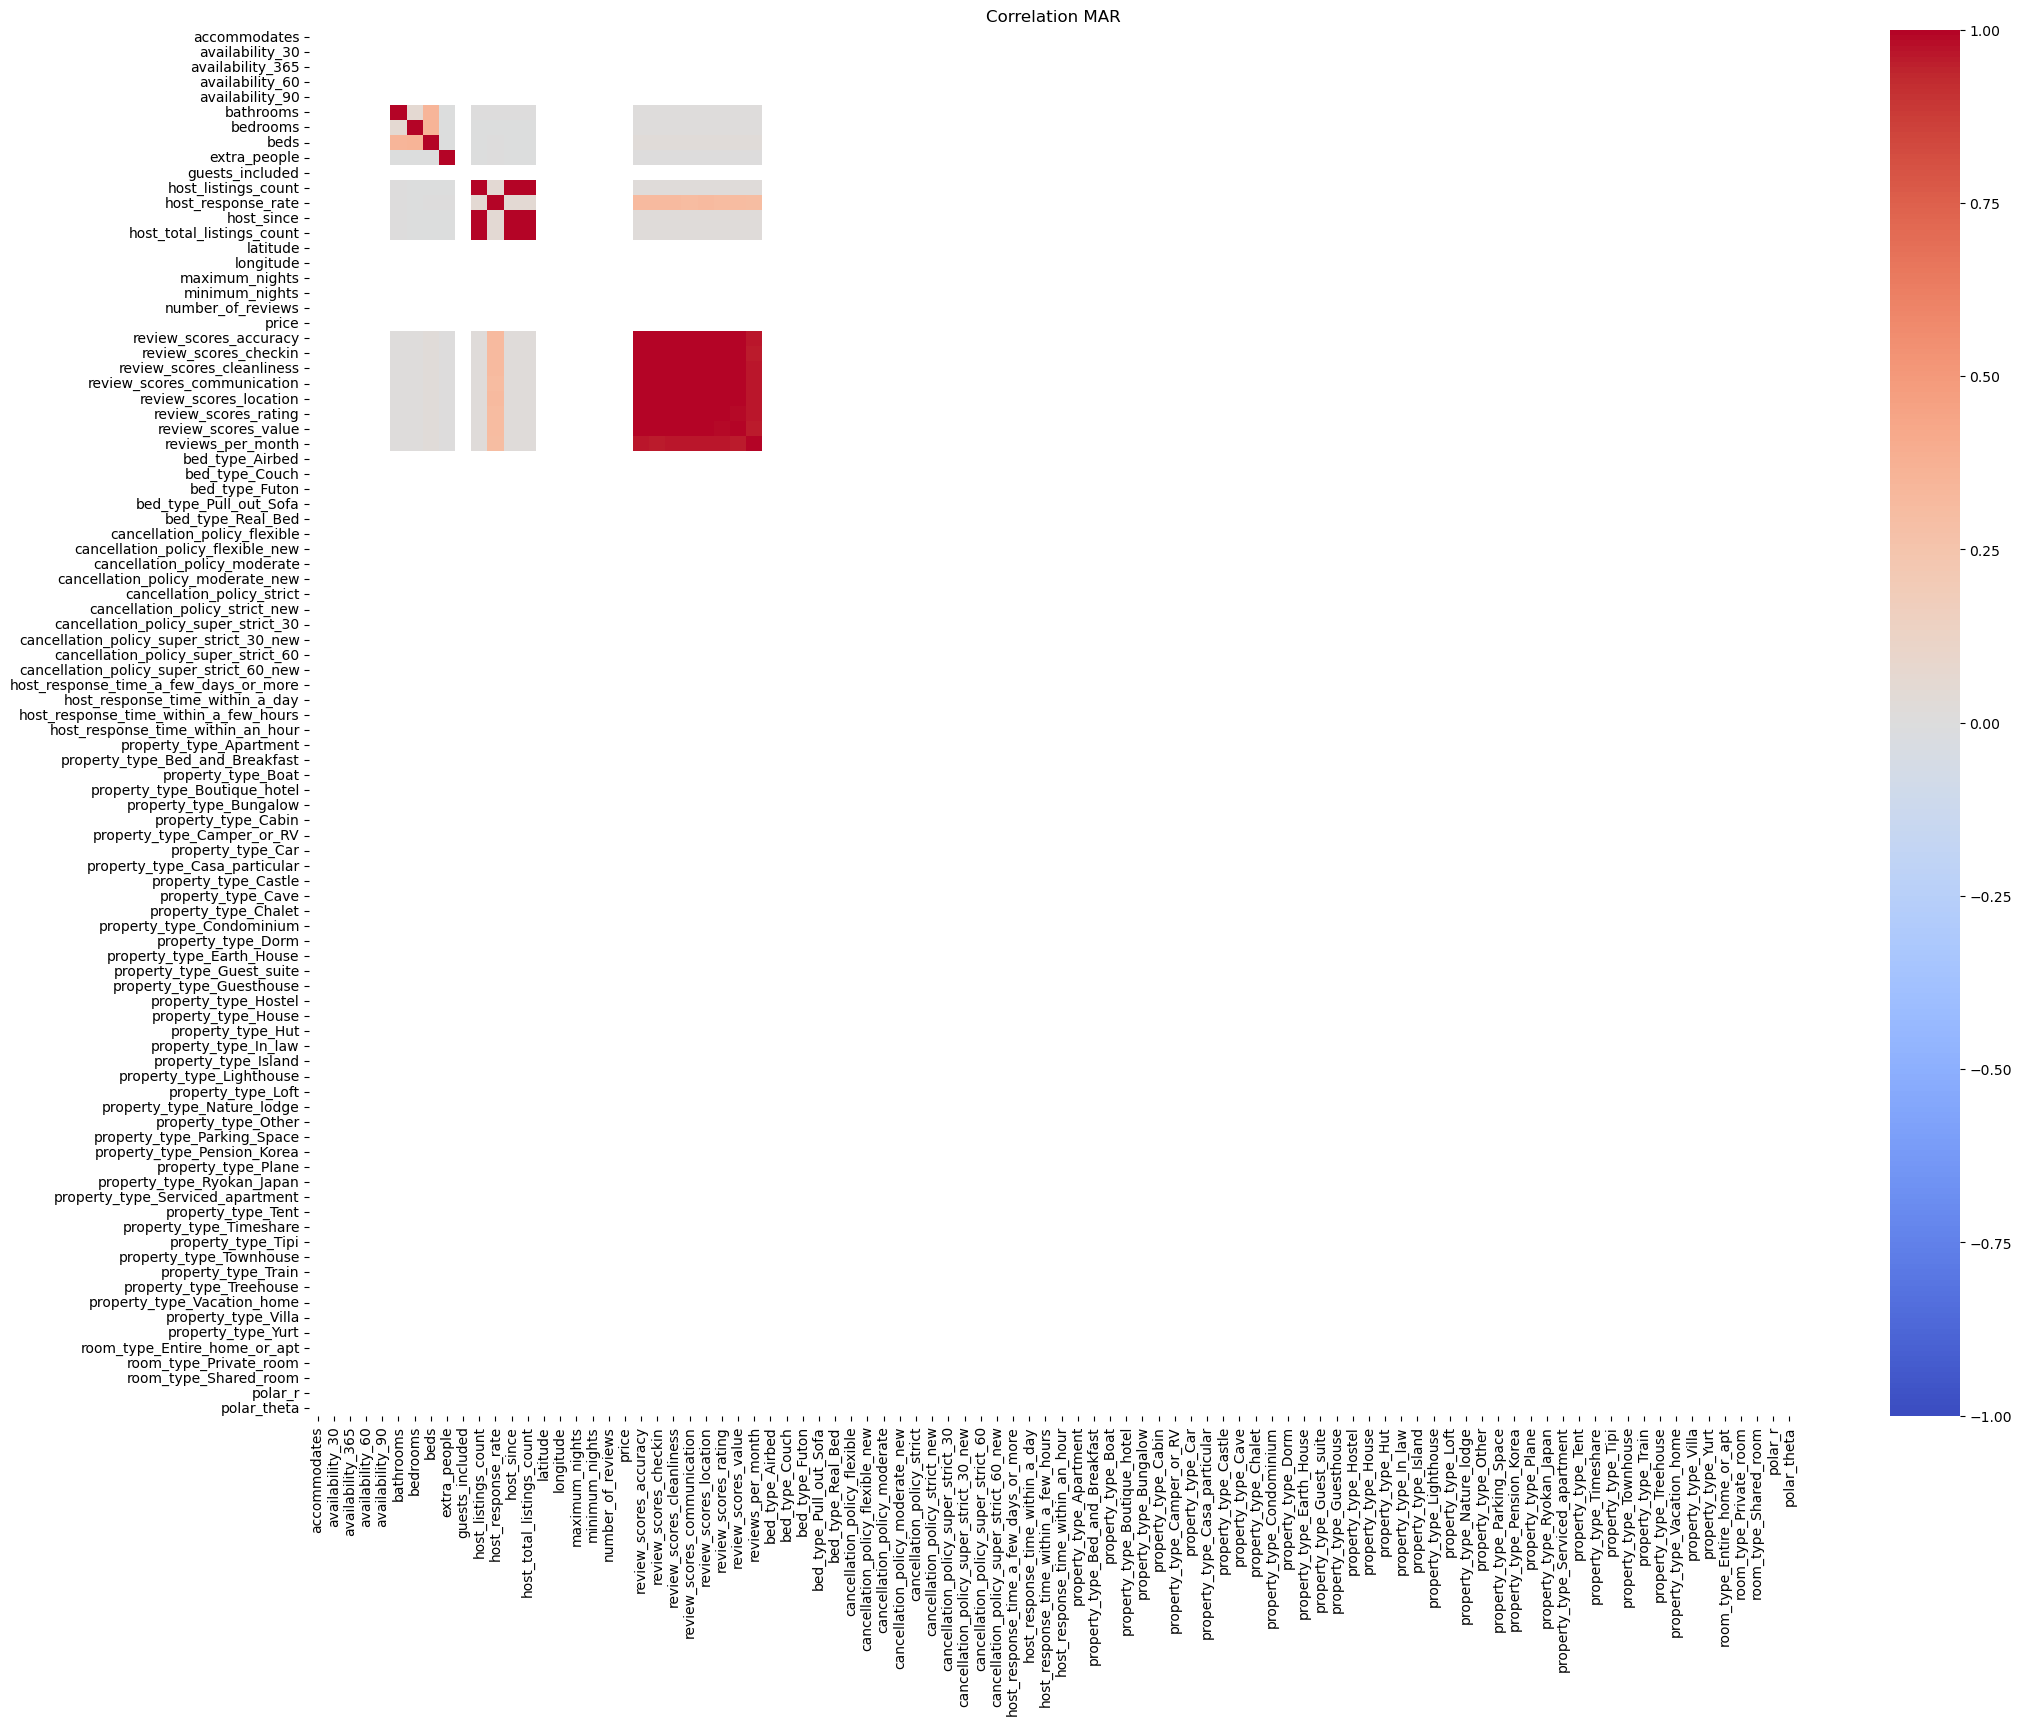

In [15]:
## Analyse missing data by:
# Is data missing MCAR/MAR/MNAR
# Add visualisation

missing_indicators = pd_transformed.isnull().astype(int)
correlations = missing_indicators.corr()

plt.figure(figsize=(24, 18))
sb.heatmap(correlations, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation MAR")
plt.show()

In [11]:
correlation_sets = {}

for x in correlations:
    correlation_sets[x] = []
    series = correlations[x]
    filtered = series[(series > 0.2) & (series < 1) ]
    for idx, value in filtered.iteritems():
        correlation_sets[x].append({idx: value})

for key,value in correlation_sets.items(): print(f"Variable: {key}, Pairing: {value} \n")

StatementMeta(, be25cada-29d6-40d8-a83d-e0f807bfdd2f, 13, Finished, Available)

Variable: accommodates, Pairing: [] 

Variable: availability_30, Pairing: [] 

Variable: availability_365, Pairing: [] 

Variable: availability_60, Pairing: [] 

Variable: availability_90, Pairing: [] 

Variable: bathrooms, Pairing: [{'beds': 0.3489634248000627}] 

Variable: bedrooms, Pairing: [{'beds': 0.35170509911504716}] 

Variable: beds, Pairing: [{'bathrooms': 0.3489634248000627}, {'bedrooms': 0.35170509911504716}] 

Variable: extra_people, Pairing: [] 

Variable: guests_included, Pairing: [] 

Variable: host_listings_count, Pairing: [] 

Variable: host_response_rate, Pairing: [{'review_scores_accuracy': 0.31302483620185606}, {'review_scores_checkin': 0.3127861326921652}, {'review_scores_cleanliness': 0.3132738984683557}, {'review_scores_communication': 0.3121407233547069}, {'review_scores_location': 0.3125319636187829}, {'review_scores_rating': 0.31222256575345564}, {'review_scores_value': 0.31219735841085383}, {'reviews_per_month': 0.3001049159094358}] 

Variable: host_since, P

/tmp/ipykernel_9419/880952456.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in filtered.iteritems():


#### Conclusion

It seems that outside of the review scores the data seems to be missing quite at random as there are no correlations between different missing data points outside of the review scores (obviously). Based on the findings in the EDA the following tranfsormation will be applied:

- Remove review score variables
- Remove variables -> number of beds
- Remove avaialbility60 & avaiability90
- Remove reviews per month and keep total number of reviews 